In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

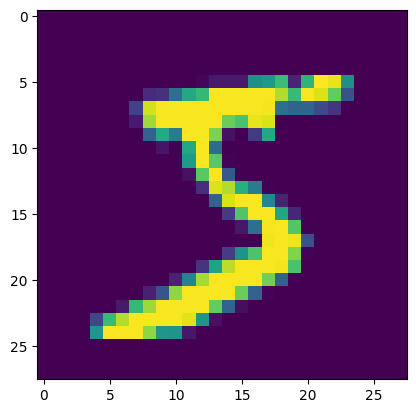

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Scaling the values between 0 and 1 by dividing each by 255(max pixel value)


In [13]:
X_train = X_train/255
X_test = X_test/255

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = Sequential()

We need to convert each 28*28 picture into 1 * 728 for the input


In [26]:
# Flatten(input_shape=(28,28)): it takes 28*28 input and will convert into automatic 1*728

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))  # 128 nodes in 1st hidden layer
model.add(Dense(64, activation='relu'))  # 64 nodes in 2nd hidden layer
# 10 nodes in output layer as we have 10 o/p posibility
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                6

In [40]:
# loss="categorical_crossentropy" => We need to encode our labels
# loss="sparse_categorical_crossentropy" => We don't need to encode our labels

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 0.2041 - val_accuracy: 0.9748
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.2091 - val_accuracy: 0.9759
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0071 - accuracy: 0.9986 - val_loss: 0.1927 - val_accuracy: 0.9752
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.2120 - val_accuracy: 0.9770
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.2558 - val_accuracy: 0.9701
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.1904 - val_accuracy: 0.9760
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.2021 - val_accuracy:

In [42]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [43]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9739

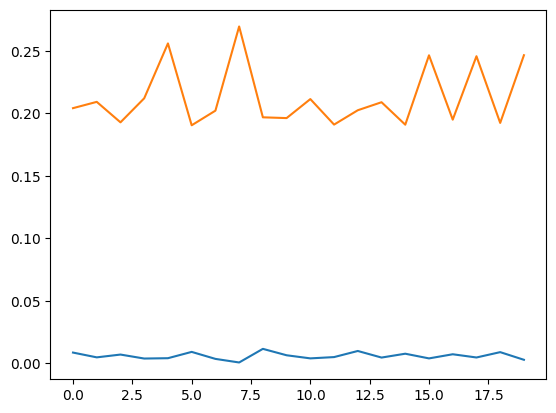

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

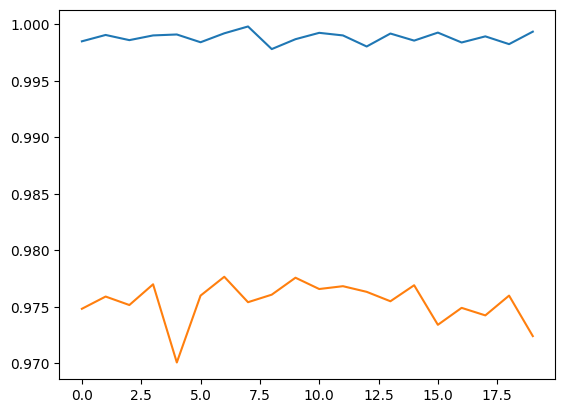

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

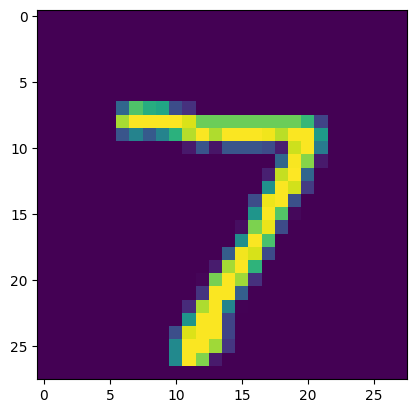

In [48]:
plt.imshow(X_test[0])

In [51]:
model.predict(X_test[0].reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 41ms/step


array([7], dtype=int64)